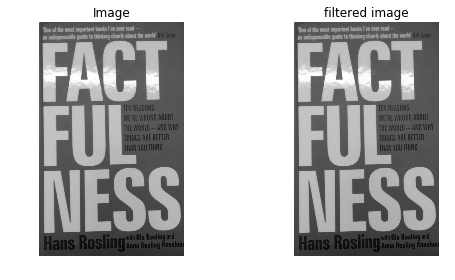

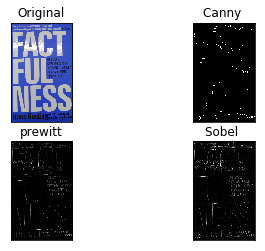

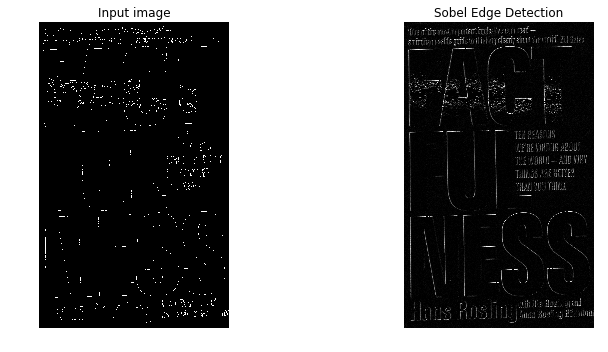

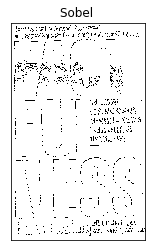

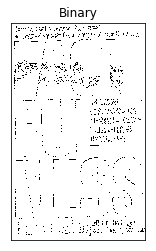

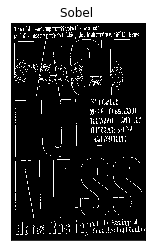

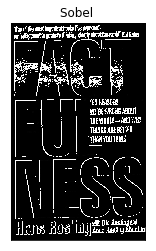

True

In [10]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
# Read Image

img = cv2.imread('six.jpg')

# Denoising
dst = cv2.fastNlMeansDenoisingColored(img,None,15,15,7,21)

b,g,r = cv2.split(dst)           # get b,g,r
rgb_dst = cv2.merge([r,g,b])     # switch it to rgb
cv2.imwrite("Images/Denoising_1_copySix.jpg", rgb_dst)



# Sharping Image
#imgIn = cv2.imread("Image/Denoising_1_copyTest.jpg", cv2.IMREAD_GRAYSCALE)
#kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
#im = cv2.filter2D(imgIn, -1, kernel)
# save Result 
#cv2.imwrite("Images/sharp_1_copySix.jpg", im)



# Geomatric mean Filter
img_geoMean = cv2.imread('Images/Denoising_1_copySix.jpg', cv2.IMREAD_GRAYSCALE).astype(float)
rows, cols = img_geoMean.shape[:2]
ksize = 5 

padsize = int((ksize-1)/2)
pad_img = cv2.copyMakeBorder(img_geoMean, *[padsize]*4, cv2.BORDER_DEFAULT)
geomean = np.zeros_like(img)
for r in range(rows):
    for c in range(cols):
        geomean[r, c] = np.prod(pad_img[r:r+ksize, c:c+ksize])**(1/(ksize**2))
geomean = np.uint8(geomean)


fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(8, 4))

ax[0].imshow(geomean, cmap=plt.cm.gray)
ax[0].set_title('Image')

ax[1].imshow(geomean, cmap=plt.cm.gray)
ax[1].set_title('filtered image')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

cv2.imwrite("Images/filter_1_copySix.jpg", geomean)




# Edge Detection

img_edge = cv2.imread('Images/filter_1_copySix.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gaussian = cv2.GaussianBlur(gray,(3,3),0)

            #canny
img_canny = cv2.Canny(img_gaussian,90,210)

            #sobel
img_sobelx = cv2.Sobel(img_gaussian,cv2.CV_8U,1,0,ksize=3)
img_sobely = cv2.Sobel(img_gaussian,cv2.CV_8U,0,1,ksize=3)
img_sobel = img_sobelx + img_sobely


            #prewitt
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)
img_prewitt = img_prewitty + img_prewittx


plt.subplot(2,2,1),plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(img_canny,cmap = 'gray')
plt.title('Canny '), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(img_prewitt,cmap = 'gray')
plt.title('prewitt'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(img_sobel,cmap = 'gray')
plt.title('Sobel '), plt.xticks([]), plt.yticks([])

plt.show()


fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(12, 5))

ax[0].imshow(img_canny, cmap=plt.cm.gray)
ax[0].set_title('Input image')

ax[1].imshow(img_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()
cv2.imwrite("Images/SobelEdgeDetectionTest_copySix.jpg", img_sobel)






# Adaptive Mean thresholding

im_at_mean = cv2.adaptiveThreshold(img_sobel, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 10)
plt.subplot(1,1,1),plt.imshow(im_at_mean,cmap = 'gray')
plt.title('Sobel '), plt.xticks([]), plt.yticks([])
plt.show()


# Adaptive Thresholding with gaussian weighted average
im_at_gauss = cv2.adaptiveThreshold(img_sobel, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 5,7)


plt.subplot(1,1,1),plt.imshow(im_at_gauss,cmap = 'gray')
plt.title('Binary'), plt.xticks([]), plt.yticks([])
plt.show()


# Fixed thresholding
retval, im_at_fixed = cv2.threshold(img_sobel, 40, 255, cv2.THRESH_BINARY)

plt.subplot(1,1,1),plt.imshow(im_at_fixed,cmap = 'gray')
plt.title('Sobel '), plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite("Images/im_at_fixed_copySix.jpg",im_at_fixed)


# Dilation
img_diln = cv2.imread("Images/im_at_fixed_copySix.jpg", cv2.IMREAD_GRAYSCALE)

kernel_dilation = np.ones((3,3),np.uint8)
dilation = cv2.dilate(img_diln,kernel_dilation,iterations = 2)

plt.subplot(1,1,1),plt.imshow(dilation,cmap = 'gray')
plt.title('Sobel '), plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite("Images/im_at_Morph_copySix.jpg",dilation)

In [11]:
from PIL import Image
import pytesseract
import argparse
import cv2
import os


text = pytesseract.image_to_string(Image.open("Images/im_at_Morph_copySix.jpg"))
#os.remove()
print(text)

' mmmmmmmmmmm—
mind'mmﬁfe memmm dmmmma' Bill Bates

   
   
   

  

TH] ﬂEﬂSDI‘lS
'J‘JE’BI': ‘J‘Iﬂﬂl‘lﬁ Aﬂﬂlﬂ
THE ‘J‘JDBLB —- AND WHY
THII‘JES Aﬂi Eff I EB

w m 1mm


In [12]:
import tesserocr
from PIL import Image
image = Image.open('Images/im_at_fixed_copySix.jpg')
print(tesserocr.image_to_text(image))  # print ocr text from image


V Trrrﬁf:rrr5£rrrrr’ﬁ[rﬂ5fvmmwf—
an md‘rs‘rtmﬂﬁcg rrrrr'rfrmm‘r durﬂv aim: {1512.er 8}}! 6513-3

     

‘J‘E BE WBUI‘JE M331”
IHE WDBLD ~A’1‘JD WHY
THJJ‘JES ABE BEHEB
THAN ‘1 DU THINK

 

 

55:5 J15 355‘ mg 555

t (9 F) \c9 1
IJ 5M} DOE) JMLJAMJ; 515J5555J551




In [15]:
import tesserocr
from PIL import Image
image = Image.open('six.jpg')
print(tesserocr.image_to_text(image))  # print ocr text from image

am Bates

TEN REASONS

WE'RE WRONG ABUUI
IHE WORLD — AND WHY
THINGS ARE BEUEH

IHAN YUU THINK

' 'th ’Ola Bosling and
Halls BOSIIIIQ :lua ﬂosling Bi‘mnlum




In [16]:
import tesserocr
from PIL import Image
image = Image.open('one.jpg')
print(tesserocr.image_to_text(image))  # print ocr text from image

     

wseaamnmnurmoammmumumwyh

lndtal Bangladesh. Bhutan. Pm. NON. 36 L8“ and In W.
Cuwlaﬂon 01 Hm edition out“ of m m 6| WW.




# using Canny edge detctor 

In [18]:
import tesserocr
from PIL import Image
image = Image.open('Images/Canny_im_at_Morph_copy.jpg')
print(tesserocr.image_to_text(image))  # print ocr text from image